# 1° Notebook para fazer testes dos modelos

## Leitura das bibliotecas e do dataset

In [ ]:
!pip install scikitplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [ ]:
import pandas as pd
import numpy as np

#images
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

from xgboost import XGBClassifier

#import scikitplot as skplt
#from dtreeviz import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Para aparecer todas as linhas e colunas do dataset

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/VetBr/vetbr_filial_target.csv')
df.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target
0,35.464.865/0001-93,8230001,300.0,1.0,N,82,823.0,82300.0,1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,35.464.962/0001-86,4399103,5000.0,1.0,F,43,439.0,43991.0,1206,4321500.0,4330404.0,NaN,NaN,NaN,F,43.0,432.0,43215.0,F,43.0,433.0,43304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,35.465.399/0001-60,4520002,5000.0,1.0,G,45,452.0,45200.0,1206,4520005.0,4399103.0,4330404.0,4330405.0,NaN,G,45.0,452.0,45200.0,F,43.0,439.0,43991.0,F,43.0,433.0,43304.0,F,43.0,433.0,43304.0,NaN,NaN,NaN,NaN,0
3,35.465.446/0001-76,9602501,1000.0,1.0,S,96,960.0,96025.0,1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,35.465.492/0001-75,7739002,2000.0,1.0,N,77,773.0,77390.0,1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.target.value_counts()

0    6000644
1      16467
Name: target, dtype: int64

In [ ]:
df.shape

(6017111, 35)

In [ ]:
df.target.value_counts()

0    6012398
1       4713
Name: target, dtype: int64

## Pré processamento

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674957 entries, 0 to 1674956
Data columns (total 40 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   cnpj            1674957 non-null  object 
 1   cnae            1674957 non-null  int64  
 2   capital_social  1674957 non-null  float64
 3   porte           1674956 non-null  float64
 4   Seção           1674924 non-null  object 
 5   Divisão         1674957 non-null  int64  
 6   Grupo           1622218 non-null  float64
 7   Classe          1622218 non-null  float64
 8   idade_empresa   1674957 non-null  int64  
 9   cnae_sec_1      716685 non-null   float64
 10  cnae_sec_2      435016 non-null   float64
 11  cnae_sec_3      280217 non-null   float64
 12  cnae_sec_4      193509 non-null   float64
 13  cnae_sec_5      140098 non-null   float64
 14  Seção1          716684 non-null   object 
 15  Divisão1        716685 non-null   float64
 16  Grupo1          716685 non-null   fl

In [ ]:
df.shape

(6017111, 35)

In [ ]:
df.describe()

,cnae,capital_social,porte,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Divisão1,Grupo1,Classe1,Divisão2,Grupo2,Classe2,Divisão3,Grupo3,Classe3,Divisão4,Grupo4,Classe4,Divisão5,Grupo5,Classe5,target,target_Seção,target_Divisão,target_Grupo,target_Classe,target_cnae
count,1.674957e+06,1.674957e+06,1.674956e+06,1.674957e+06,1.622218e+06,1.622218e+06,1.674957e+06,7.166850e+05,4.350160e+05,2.802170e+05,1.935090e+05,1.400980e+05,716685.000000,716685.000000,716685.000000,435016.000000,435016.000000,435016.000000,280217.000000,280217.000000,280217.000000,193509.000000,193509.000000,193509.000000,140098.000000,140098.000000,140098.000000,1.674957e+06,1.674957e+06,1.674957e+06,1.674957e+06,1.674957e+06,1.674957e+06
mean,5.908991e+06,6.420051e+07,2.198682e+00,5.865599e+01,5.808948e+02,5.812104e+04,5.017105e+03,5.389692e+06,5.484345e+06,5.280392e+06,5.326571e+06,5.394331e+06,53.481151,538.621214,53896.805987,54.402971,548.050237,54843.322174,52.378128,527.668775,52803.791105,52.829300,532.280592,53265.557959,53.514468,539.035061,53943.156369,1.010713e-02,-9.797660e-01,-9.793893e-01,-9.450625e-01,-8.783121e-01,-8.700653e-01
std,2.264956e+06,2.083944e+09,1.800275e+00,2.262460e+01,2.235766e+02,2.235785e+04,4.705969e+03,2.092700e+06,2.075695e+06,1.888827e+06,1.901292e+06,1.963157e+06,20.929091,209.255742,20926.990374,20.729170,207.510764,20756.940390,18.913244,188.880940,18888.261757,19.036523,190.132609,19012.894997,19.669756,196.300025,19631.541785,1.000249e-01,2.000970e-01,2.009979e-01,2.685772e-01,3.565028e-01,3.650561e-01
min,1.113010e+05,0.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.113000e+03,4.500000e+01,1.113010e+05,1.113010e+05,1.113010e+05,1.113010e+05,1.113010e+05,1.000000,11.000000,1113.000000,1.000000,11.000000,1113.000000,1.000000,11.000000,1113.000000,1.000000,11.000000,1113.000000,1.000000,11.000000,1113.000000,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,4.721102e+06,0.000000e+00,1.000000e+00,4.700000e+01,4.710000e+02,4.712100e+04,1.366000e+03,4.635402e+06,4.635402e+06,4.530705e+06,4.541202e+06,4.530705e+06,46.000000,463.000000,46354.000000,46.000000,463.000000,46354.000000,45.000000,453.000000,45307.000000,45.000000,454.000000,45412.000000,45.000000,453.000000,45307.000000,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,4.789004e+06,1.000000e+03,1.000000e+00,4.700000e+01,4.780000e+02,4.783100e+04,3.409000e+03,4.772500e+06,4.772500e+06,4.763601e+06,4.763604e+06,4.772500e+06,47.000000,477.000000,47725.000000,47.000000,477.000000,47725.000000,47.000000,476.000000,47636.000000,47.000000,476.000000,47636.000000,47.000000,477.000000,47725.000000,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
75%,8.219999e+06,1.000000e+04,5.000000e+00,8.200000e+01,7.910000e+02,7.911200e+04,7.518000e+03,6.202300e+06,6.821801e+06,6.141800e+06,6.209100e+06,6.822600e+06,62.000000,620.000000,62023.000000,68.000000,682.000000,68218.000000,61.000000,614.000000,61418.000000,62.000000,620.000000,62091.000000,68.000000,682.000000,68226.000000,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
max,9.900800e+06,2.620188e+11,5.000000e+00,9.900000e+01,9.900000e+02,9.900800e+04,4.461800e+04,9.900800e+06,9.900800e+06,9.900800e+06,9.900800e+06,9.700500e+06,99.000000,990.000000,99008.000000,99.000000,990.000000,99008.000000,99.000000,990.000000,99008.000000,99.000000,990.000000,99008.000000,97.000000,970.000000,97005.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.capital_social.value_counts()

In [ ]:
df.porte.value_counts()

1.0    4150926
5.0    1727491
3.0     138693
Name: porte, dtype: int64

In [ ]:
df = df.convert_dtypes()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017111 entries, 0 to 6017110
Data columns (total 40 columns):
 #   Column          Dtype  
---  ------          -----  
 0   cnpj            string 
 1   cnae            Int64  
 2   capital_social  Float64
 3   porte           Int64  
 4   Seção           string 
 5   Divisão         Int64  
 6   Grupo           Int64  
 7   Classe          Int64  
 8   idade_empresa   Int64  
 9   cnae_sec_1      Int64  
 10  cnae_sec_2      Int64  
 11  cnae_sec_3      Int64  
 12  cnae_sec_4      Int64  
 13  cnae_sec_5      Int64  
 14  Seção1          string 
 15  Divisão1        Int64  
 16  Grupo1          Int64  
 17  Classe1         Int64  
 18  Seção2          string 
 19  Divisão2        Int64  
 20  Grupo2          Int64  
 21  Classe2         Int64  
 22  Seção3          string 
 23  Divisão3        Int64  
 24  Grupo3          Int64  
 25  Classe3         Int64  
 26  Seção4          string 
 27  Divisão4        Int64  
 28  Grupo4      

### Dados nulos

In [ ]:
df.isnull().sum()

cnpj                    0
cnae                    0
capital_social          0
porte                   1
Seção                  70
Divisão                 0
Grupo              220948
Classe             220948
idade_empresa           0
cnae_sec_1        3538072
cnae_sec_2        4509174
cnae_sec_3        5041739
cnae_sec_4        5353297
cnae_sec_5        5543453
Seção1            3538072
Divisão1          3538072
Grupo1            3538072
Classe1           3538072
Seção2            4509176
Divisão2          4509174
Grupo2            4509174
Classe2           4509174
Seção3            5041740
Divisão3          5041739
Grupo3            5041739
Classe3           5041739
Seção4            5353297
Divisão4          5353297
Grupo4            5353297
Classe4           5353297
Seção5            5543455
Divisão5          5543453
Grupo5            5543453
Classe5           5543453
target                  0
dtype: int64

In [ ]:
df['target'].value_counts()

0    6012398
1       4713
Name: target, dtype: Int64

In [ ]:
df['target_Seção'].value_counts()

In [ ]:
secao_nula = df[df['Seção'].isnull()]
secao_nula.cnae.value_counts()

9900800    70
Name: cnae, dtype: Int64

In [ ]:
grupo_nula = df[df['Grupo'].isnull()]
grupo_nula.cnae.value_counts()

8888888    220948
Name: cnae, dtype: Int64

In [ ]:
classe_nula = df[df['Classe'].isnull()]
classe_nula.cnae.value_counts()

8888888    220948
Name: cnae, dtype: Int64

In [ ]:
cnaes = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/CNPJ_metadados/categorias_cnaes_atuais.csv', dtype=str)
cnaes.head()

,cnae,Denominação,Seção,Divisão,Grupo,Classe,Subclasse,Seção_str,Divisão_str,Grupo_str,Classe_str,Subclasse_str
0,0111301,Cultivo de arroz,A,01,01.1,01.11-3,0111-3/01,"AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PES...","AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS",Produção de lavouras temporárias,Cultivo de cereais,Cultivo de arroz
1,0111302,Cultivo de milho,A,01,01.1,01.11-3,0111-3/02,"AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PES...","AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS",Produção de lavouras temporárias,Cultivo de cereais,Cultivo de milho
2,0111303,Cultivo de trigo,A,01,01.1,01.11-3,0111-3/03,"AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PES...","AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS",Produção de lavouras temporárias,Cultivo de cereais,Cultivo de trigo
3,0111399,Cultivo de outros cereais não especificados an...,A,01,01.1,01.11-3,0111-3/99,"AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PES...","AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS",Produção de lavouras temporárias,Cultivo de cereais,Cultivo de outros cereais não especificados an...
4,0112101,Cultivo de algodão herbáceo,A,01,01.1,01.12-1,0112-1/01,"AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PES...","AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS",Produção de lavouras temporárias,Cultivo de algodão herbáceo e de outras fibras...,Cultivo de algodão herbáceo


In [ ]:
cnaes.isnull().sum()

cnae             0
Denominação      0
Seção            1
Divisão          0
Grupo            1
Classe           1
Subclasse        0
Seção_str        1
Divisão_str      0
Grupo_str        1
Classe_str       1
Subclasse_str    0
dtype: int64

In [ ]:
cnaes[cnaes['cnae'] == 9900800]

,cnae,Denominação,Seção,Divisão,Grupo,Classe,Subclasse,Seção_str,Divisão_str,Grupo_str,Classe_str,Subclasse_str


In [ ]:
df[df['cnae'] == 9900800]

,cnpj,cnpj_basico,identificador_matriz_filial,data_inicio_atividade,cnae,cnae_fiscal_principal,cnae_fiscal_secundaria,tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,municipio,capital_social,porte,Denominação,Seção,Divisão,Grupo,Classe,Subclasse,Seção_str,Divisão_str,Grupo_str,Classe_str,Subclasse_str,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target
164495,02.263.991/0001-20,2263991,MATRIZ,19970729,9900800,Organismos internacionais e outras instituiçõe...,<NA>,PRACA,DAMATRIZ,450,<NA>,APARECIDA DE MINAS,38205000,MG,FRUTAL,0.0,5,Organismos internacionais e outras instituiçõe...,<NA>,99,990,99008,9900800,<NA>,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,9344,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
181522,04.384.000/0001-93,4384000,MATRIZ,19941025,9900800,Organismos internacionais e outras instituiçõe...,<NA>,AVENIDA,DO CONTORNO,6777,SALA 1301 A 1304,SANTO ANTONIO,30110035,MG,BELO HORIZONTE,0.0,5,Organismos internacionais e outras instituiçõe...,<NA>,99,990,99008,9900800,<NA>,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,10352,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
184423,17.439.878/0001-20,17439878,MATRIZ,19820628,9900800,Organismos internacionais e outras instituiçõe...,<NA>,AVENIDA,GOVERNADOR VALADARES,S N,<NA>,CENTRO,32900000,MG,IGARAPE,0.0,5,Organismos internacionais e outras instituiçõe...,<NA>,99,990,99008,9900800,<NA>,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,14854,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
187630,17.767.203/0001-00,17767203,MATRIZ,19730326,9900800,Organismos internacionais e outras instituiçõe...,<NA>,PRACA,TIRADENTES,30,<NA>,CENTRO,36520000,MG,VISCONDE DO RIO BRANCO,0.0,5,Organismos internacionais e outras instituiçõe...,<NA>,99,990,99008,9900800,<NA>,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,18235,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
210652,20.211.272/0001-48,20211272,MATRIZ,19850925,9900800,Organismos internacionais e outras instituiçõe...,<NA>,RUA,VISCONDE DE OURO PRETO,147,1 E 2 ANDARES,CENTRO,35790000,MG,CURVELO,0.0,5,Organismos internacionais e outras instituiçõe...,<NA>,99,990,99008,9900800,<NA>,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,13669,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
244610,23.312.747/0001-80,23312747,MATRIZ,19870623,9900800,Organismos internacionais e outras instituiçõe...,<NA>,RUA,JORGE BRAGA,131,<NA>,AVENIDA,37504052,MG,ITAJUBA,0.0,5,Organismos internacionais e outras instituiçõe...,<NA>,99,990,99008,9900800,<NA>,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras instituiçõe...,Organismos internacionais e outras

In [ ]:
df[df['cnae'] == 8888888].shape

(220948, 55)

In [ ]:
df.dropna(subset=['Seção','Grupo'], inplace=True)
df.isnull().sum()

cnpj                    0
cnae                    0
capital_social          0
porte                   1
Seção                   0
Divisão                 0
Grupo                   0
Classe                  0
idade_empresa           0
cnae_sec_1        3317055
cnae_sec_2        4288156
cnae_sec_3        4820721
cnae_sec_4        5132279
cnae_sec_5        5322435
Seção1            3317055
Divisão1          3317055
Grupo1            3317055
Classe1           3317055
Seção2            4288158
Divisão2          4288156
Grupo2            4288156
Classe2           4288156
Seção3            4820722
Divisão3          4820721
Grupo3            4820721
Classe3           4820721
Seção4            5132279
Divisão4          5132279
Grupo4            5132279
Classe4           5132279
Seção5            5322437
Divisão5          5322435
Grupo5            5322435
Classe5           5322435
target                  0
dtype: int64

In [ ]:
df[df['cnae'] == 9900800]

In [ ]:
df = df[(df['cnae'] != 9900800) & (df['cnae'] != 8888888)]
df.shape

(5796093, 35)

In [ ]:
df['cnae_sec_1'] = df['cnae_sec_1'].fillna(df['cnae'])
df['cnae_sec_2'] = df['cnae_sec_2'].fillna(df['cnae'])
df['cnae_sec_3'] = df['cnae_sec_3'].fillna(df['cnae'])
df['cnae_sec_4'] = df['cnae_sec_4'].fillna(df['cnae'])
df['cnae_sec_5'] = df['cnae_sec_5'].fillna(df['cnae'])

In [ ]:
df['Seção1'] = df['Seção1'].fillna(df['Seção'])
df['Seção2'] = df['Seção2'].fillna(df['Seção'])
df['Seção3'] = df['Seção3'].fillna(df['Seção'])
df['Seção4'] = df['Seção4'].fillna(df['Seção'])
df['Seção5'] = df['Seção5'].fillna(df['Seção'])

In [ ]:
df['Divisão1'] = df['Divisão1'].fillna(df['Divisão'])
df['Divisão2'] = df['Divisão2'].fillna(df['Divisão'])
df['Divisão3'] = df['Divisão3'].fillna(df['Divisão'])
df['Divisão4'] = df['Divisão4'].fillna(df['Divisão'])
df['Divisão5'] = df['Divisão5'].fillna(df['Divisão'])

In [ ]:
df['Grupo1'] = df['Grupo1'].fillna(df['Grupo'])
df['Grupo2'] = df['Grupo2'].fillna(df['Grupo'])
df['Grupo3'] = df['Grupo3'].fillna(df['Grupo'])
df['Grupo4'] = df['Grupo4'].fillna(df['Grupo'])
df['Grupo5'] = df['Grupo5'].fillna(df['Grupo'])

In [ ]:
df['Classe1'] = df['Classe1'].fillna(df['Classe'])
df['Classe2'] = df['Classe2'].fillna(df['Classe'])
df['Classe3'] = df['Classe3'].fillna(df['Classe'])
df['Classe4'] = df['Classe4'].fillna(df['Classe'])
df['Classe5'] = df['Classe5'].fillna(df['Classe'])

In [ ]:
df.shape

(5796093, 35)

In [ ]:
df.isnull().sum()

cnpj              0
cnae              0
capital_social    0
porte             1
Seção             0
Divisão           0
Grupo             0
Classe            0
idade_empresa     0
cnae_sec_1        0
cnae_sec_2        0
cnae_sec_3        0
cnae_sec_4        0
cnae_sec_5        0
Seção1            0
Divisão1          0
Grupo1            0
Classe1           0
Seção2            0
Divisão2          0
Grupo2            0
Classe2           0
Seção3            0
Divisão3          0
Grupo3            0
Classe3           0
Seção4            0
Divisão4          0
Grupo4            0
Classe4           0
Seção5            0
Divisão5          0
Grupo5            0
Classe5           0
target            0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

cnpj              0
cnae              0
capital_social    0
porte             0
Seção             0
Divisão           0
Grupo             0
Classe            0
idade_empresa     0
cnae_sec_1        0
cnae_sec_2        0
cnae_sec_3        0
cnae_sec_4        0
cnae_sec_5        0
Seção1            0
Divisão1          0
Grupo1            0
Classe1           0
Seção2            0
Divisão2          0
Grupo2            0
Classe2           0
Seção3            0
Divisão3          0
Grupo3            0
Classe3           0
Seção4            0
Divisão4          0
Grupo4            0
Classe4           0
Seção5            0
Divisão5          0
Grupo5            0
Classe5           0
target            0
dtype: int64

In [ ]:
df.shape

(5796092, 35)

In [ ]:
df.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target
0,35.464.865/0001-93,8230001,300.0,1,N,82,823,82300,1206,8230001,8230001,8230001,8230001,8230001,N,82,823,82300,N,82,823,82300,N,82,823,82300,N,82,823,82300,N,82,823,82300,0
1,35.464.962/0001-86,4399103,5000.0,1,F,43,439,43991,1206,4321500,4330404,4399103,4399103,4399103,F,43,432,43215,F,43,433,43304,F,43,439,43991,F,43,439,43991,F,43,439,43991,0
2,35.465.399/0001-60,4520002,5000.0,1,G,45,452,45200,1206,4520005,4399103,4330404,4330405,4520002,G,45,452,45200,F,43,439,43991,F,43,433,43304,F,43,433,43304,G,45,452,45200,0
3,35.465.446/0001-76,9602501,1000.0,1,S,96,960,96025,1206,9602501,9602501,9602501,9602501,9602501,S,96,960,96025,S,96,960,96025,S,96,960,96025,S,96,960,96025,S,96,960,96025,0
4,35.465.492/0001-75,7739002,2000.0,1,N,77,773,77390,1206,7739002,7739002,7739002,7739002,7739002,N,77,773,77390,N,77,773,77390,N,77,773,77390,N,77,773,77390,N,77,773,77390,0


In [ ]:
df.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target,target_Seção,target_Divisão,target_Grupo,target_Classe,target_cnae
0,35.464.865/0001-93,8230001,300.0,1,N,82,823,82300,1210,8230001,8230001,8230001,8230001,8230001,N,82,823,82300,N,82,823,82300,N,82,823,82300,N,82,823,82300,N,82,823,82300,0,-1,-1,-1,-1,-1
1,35.464.962/0001-86,4399103,5000.0,1,F,43,439,43991,1210,4321500,4330404,4399103,4399103,4399103,F,43,432,43215,F,43,433,43304,F,43,439,43991,F,43,439,43991,F,43,439,43991,0,-1,-1,-1,-1,-1
2,35.465.399/0001-60,4520002,5000.0,1,G,45,452,45200,1210,4520005,4399103,4330404,4330405,4520002,G,45,452,45200,F,43,439,43991,F,43,433,43304,F,43,433,43304,G,45,452,45200,0,-1,-1,-1,-1,-1
3,35.465.446/0001-76,9602501,1000.0,1,S,96,960,96025,1210,9602501,9602501,9602501,9602501,9602501,S,96,960,96025,S,96,960,96025,S,96,960,96025,S,96,960,96025,S,96,960,96025,0,-1,-1,-1,-1,-1
4,35.465.492/0001-75,7739002,2000.0,1,N,77,773,77390,1210,7739002,7739002,7739002,7739002,7739002,N,77,773,77390,N,77,773,77390,N,77,773,77390,N,77,773,77390,N,77,773,77390,0,-1,-1,-1,-1,-1


In [ ]:
df['target'].value_counts()

0    5779625
1      16467
Name: target, dtype: Int64

## Separando o dataset em 5 datasets para fazer os modelos

In [ ]:
df.shape

(5796092, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796092 entries, 0 to 5796091
Data columns (total 40 columns):
 #   Column          Dtype  
---  ------          -----  
 0   cnpj            object 
 1   cnae            int64  
 2   capital_social  float64
 3   porte           int64  
 4   Seção           object 
 5   Divisão         int64  
 6   Grupo           int64  
 7   Classe          int64  
 8   idade_empresa   int64  
 9   cnae_sec_1      int64  
 10  cnae_sec_2      int64  
 11  cnae_sec_3      int64  
 12  cnae_sec_4      int64  
 13  cnae_sec_5      int64  
 14  Seção1          object 
 15  Divisão1        int64  
 16  Grupo1          int64  
 17  Classe1         int64  
 18  Seção2          object 
 19  Divisão2        int64  
 20  Grupo2          int64  
 21  Classe2         int64  
 22  Seção3          object 
 23  Divisão3        int64  
 24  Grupo3          int64  
 25  Classe3         int64  
 26  Seção4          object 
 27  Divisão4        int64  
 28  Grupo4      

In [ ]:
df['Seção'].value_counts()

G    653690
S    230637
I    139535
C    137726
H     86766
N     84820
F     69022
M     66635
P     49300
Q     30899
J     26740
R     18664
K     11805
L      7906
T      6145
E      4600
O      3174
D      1029
Name: Seção, dtype: Int64

In [ ]:
df['Seção'] = [ord(x) - 64 for x in df['Seção']]
df.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target
0,35.464.865/0001-93,8230001,300.0,1,14,82,823,82300,1206,8230001,8230001,8230001,8230001,8230001,N,82,823,82300,N,82,823,82300,N,82,823,82300,N,82,823,82300,N,82,823,82300,0
1,35.464.962/0001-86,4399103,5000.0,1,6,43,439,43991,1206,4321500,4330404,4399103,4399103,4399103,F,43,432,43215,F,43,433,43304,F,43,439,43991,F,43,439,43991,F,43,439,43991,0
2,35.465.399/0001-60,4520002,5000.0,1,7,45,452,45200,1206,4520005,4399103,4330404,4330405,4520002,G,45,452,45200,F,43,439,43991,F,43,433,43304,F,43,433,43304,G,45,452,45200,0
3,35.465.446/0001-76,9602501,1000.0,1,19,96,960,96025,1206,9602501,9602501,9602501,9602501,9602501,S,96,960,96025,S,96,960,96025,S,96,960,96025,S,96,960,96025,S,96,960,96025,0
4,35.465.492/0001-75,7739002,2000.0,1,14,77,773,77390,1206,7739002,7739002,7739002,7739002,7739002,N,77,773,77390,N,77,773,77390,N,77,773,77390,N,77,773,77390,N,77,773,77390,0


In [ ]:
df['Seção'].value_counts()

7     1938130
19     883694
9      548049
3      519917
6      351379
14     319230
8      312650
13     280845
16     152619
17     117935
10      94192
18      62805
11      48849
20      45996
1       43086
12      33824
2       17517
5       12712
15       9610
4        3053
Name: Seção, dtype: int64

In [ ]:
df['Seção1'] = [ord(x) - 64 for x in df['Seção1']]
df['Seção2'] = [ord(x) - 64 for x in df['Seção2']]
df['Seção3'] = [ord(x) - 64 for x in df['Seção3']]
df['Seção4'] = [ord(x) - 64 for x in df['Seção4']]
df['Seção5'] = [ord(x) - 64 for x in df['Seção5']]

df.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target
0,35.464.865/0001-93,8230001,300.0,1,14,82,823,82300,1206,8230001,8230001,8230001,8230001,8230001,14,82,823,82300,14,82,823,82300,14,82,823,82300,14,82,823,82300,14,82,823,82300,0
1,35.464.962/0001-86,4399103,5000.0,1,6,43,439,43991,1206,4321500,4330404,4399103,4399103,4399103,6,43,432,43215,6,43,433,43304,6,43,439,43991,6,43,439,43991,6,43,439,43991,0
2,35.465.399/0001-60,4520002,5000.0,1,7,45,452,45200,1206,4520005,4399103,4330404,4330405,4520002,7,45,452,45200,6,43,439,43991,6,43,433,43304,6,43,433,43304,7,45,452,45200,0
3,35.465.446/0001-76,9602501,1000.0,1,19,96,960,96025,1206,9602501,9602501,9602501,9602501,9602501,19,96,960,96025,19,96,960,96025,19,96,960,96025,19,96,960,96025,19,96,960,96025,0
4,35.465.492/0001-75,7739002,2000.0,1,14,77,773,77390,1206,7739002,7739002,7739002,7739002,7739002,14,77,773,77390,14,77,773,77390,14,77,773,77390,14,77,773,77390,14,77,773,77390,0


In [ ]:
df[df['target'] == 1].tail(20)

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target,target_Seção,target_Divisão,target_Grupo,target_Classe,target_cnae
613709,09.471.195/0001-22,4744099,10000.0,1,7,47,474,47440,5445,4744099,4744099,4744099,4744099,4744099,7,47,474,47440,7,47,474,47440,7,47,474,47440,7,47,474,47440,7,47,474,47440,1,1,1,1,1,1
613721,09.478.469/0001-05,4744099,20000.0,1,7,47,474,47440,5430,4742300,4744002,4744003,4744001,4741500,7,47,474,47423,7,47,474,47440,7,47,474,47440,7,47,474,47440,7,47,474,47415,1,1,1,1,1,1
660099,10.204.847/0001-41,1099699,100000.0,5,3,10,109,10996,5332,1066000,1099699,1099699,1099699,1099699,3,10,106,10660,3,10,109,10996,3,10,109,10996,3,10,109,10996,3,10,109,10996,1,1,1,1,1,1
764888,07.984.819/0001-80,4742300,10000.0,1,7,47,474,47423,6129,4751201,4789007,4742300,4742300,4742300,7,47,475,47512,7,47,478,47890,7,47,474,47423,7,47,474,47423,7,47,474,47423,1,1,1,1,1,1
780015,09.104.065/0001-51,4633801,200000.0,3,7,46,463,46338,5618,113000,119901,119903,119905,119906,1,1,11,1130,1,1,11,1199,1,1,11,1199,1,1,11,1199,1,1,11,1199,1,1,1,1,1,1
782977,10.268.603/0001-22,5590699,200000.0,1,9,55,559,55906,5310,4929902,4929904,7911200,5590699,5590699,8,49,492,49299,8,49,492,49299,14,79,791,79112,9,55,559,55906,9,55,559,55906,1,1,1,1,1,1
788444,12.810.924/0001-32,1121600,150000.0,3,3,11,112,11216,4492,1122499,4635401,4635403,4723700,3600602,3,11,112,11224,7,46,463,46354,7,46,463,46354,7,47,472,47237,5,36,360,36006,1,1,1,1,1,1
845438,31.572.157/0001-15,4789004,15000.0,1,7,47,478,47890,1613,4530703,4742300,4744001,4744005,4789005,7,45,453,45307,7,47,474,47423,7,47,474,47440,7,47,474,47440,7,47,478,47890,1,1,1,1,1,1
914729,41.250.994/0001-81,4744099,0.0,1,7,47,474,47440,10780,4781400,4744099,4744099,4744099,4744099,7,47,478,47814,7,47,474,47440,7,47,474,47440,7,47,474,47440,7,47,474,47440,1,1,1,1,1,1
950997,10.862.486/0001-20,4744002,20000.0,1,7,47,474,47440,5025,4744099,4742300,4744001,4744003,4741500,7,47,474,47440,7,47,474,47423,7,47,474,47440,7,47,474,47440,7,47,474,47415,1,1,1,1,1,1


In [ ]:
df.isnull().sum()

cnpj              0
cnae              0
capital_social    0
porte             0
Seção             0
Divisão           0
Grupo             0
Classe            0
idade_empresa     0
cnae_sec_1        0
cnae_sec_2        0
cnae_sec_3        0
cnae_sec_4        0
cnae_sec_5        0
Seção1            0
Divisão1          0
Grupo1            0
Classe1           0
Seção2            0
Divisão2          0
Grupo2            0
Classe2           0
Seção3            0
Divisão3          0
Grupo3            0
Classe3           0
Seção4            0
Divisão4          0
Grupo4            0
Classe4           0
Seção5            0
Divisão5          0
Grupo5            0
Classe5           0
target            0
target_Seção      0
target_Divisão    0
target_Grupo      0
target_Classe     0
target_cnae       0
dtype: int64

In [ ]:
df.to_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/VetBr/dataset_limpo_vetbr_filial.csv', index=False)

In [ ]:
df.to_csv('/content/drive/MyDrive/Projetos_ion/ION_Smart_Locator/datasets/Tupan/dataset_limpo_tupan_filial1.csv', index=False)

In [ ]:
df = pd.read_csv('dataset_limpo_numeros.csv')
df.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target,target_Seção,target_Divisão,target_Grupo,target_Classe,target_cnae
0,35.464.865/0001-93,8230001,300.0,1,14,82,823,82300,1179,8230001,8230001,8230001,8230001,8230001,14,82,823,82300,14,82,823,82300,14,82,823,82300,14,82,823,82300,14,82,823,82300,0,-1,-1,-1,-1,-1
1,35.464.962/0001-86,4399103,5000.0,1,6,43,439,43991,1179,4321500,4330404,4399103,4399103,4399103,6,43,432,43215,6,43,433,43304,6,43,439,43991,6,43,439,43991,6,43,439,43991,0,-1,-1,-1,-1,0
2,35.465.399/0001-60,4520002,5000.0,1,7,45,452,45200,1179,4520005,4399103,4330404,4330405,4520002,7,45,452,45200,6,43,439,43991,6,43,433,43304,6,43,433,43304,7,45,452,45200,0,-1,-1,-1,-1,-1
3,35.465.446/0001-76,9602501,1000.0,1,19,96,960,96025,1179,9602501,9602501,9602501,9602501,9602501,19,96,960,96025,19,96,960,96025,19,96,960,96025,19,96,960,96025,19,96,960,96025,0,-1,-1,-1,-1,-1
4,35.465.492/0001-75,7739002,2000.0,1,14,77,773,77390,1179,7739002,7739002,7739002,7739002,7739002,14,77,773,77390,14,77,773,77390,14,77,773,77390,14,77,773,77390,14,77,773,77390,0,-1,-1,0,0,0


In [ ]:
dataset_secao = df[df['target_Seção'] != -1]
dataset_divisao = df[df['target_Divisão'] != -1]
dataset_grupo = df[df['target_Grupo'] != -1]
dataset_classe = df[df['target_Classe'] != -1]
dataset_cnae = df[df['target_cnae'] != -1]

In [ ]:
print(f"Distribuição do target: \n{dataset_secao['target_Seção'].value_counts()}")
print(' ')
print(f"Distribuição do target: \n{dataset_divisao['target_Divisão'].value_counts()}")
print(' ')
print(f"Distribuição do target: \n{dataset_grupo['target_Grupo'].value_counts()}")
print(' ')
print(f"Distribuição do target: \n{dataset_classe['target_Classe'].value_counts()}")
print(' ')
print(f"Distribuição do target: \n{dataset_cnae['target_cnae'].value_counts()}")
print(' ')

Distribuição do target: 
0    48034
1      285
Name: target_Seção, dtype: int64
 
Distribuição do target: 
0    541940
1       285
Name: target_Divisão, dtype: int64
 
Distribuição do target: 
0    865733
1       285
Name: target_Grupo, dtype: int64
 
Distribuição do target: 
0    1545538
1        285
Name: target_Classe, dtype: int64
 
Distribuição do target: 
0    2227574
1        285
Name: target_cnae, dtype: int64
 


### Target: Seção

In [ ]:
dataset_secao.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target,target_Seção,target_Divisão,target_Grupo,target_Classe,target_cnae
46,35.470.208/0001-59,9700500,1000.0,1,20,97,970,97005,1177,9700500,9700500,9700500,9700500,9700500,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,0,0,0,0,0,0
72,35.474.461/0001-80,3832700,1.0,1,5,38,383,38327,1177,3831901,3839499,3832700,3832700,3832700,5,38,383,38319,5,38,383,38394,5,38,383,38327,5,38,383,38327,5,38,383,38327,0,0,0,0,0,0
91,35.477.053/0001-82,9700500,100.0,1,20,97,970,97005,1177,9700500,9700500,9700500,9700500,9700500,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,0,0,0,0,0,0
105,35.478.393/0001-28,9700500,100.0,1,20,97,970,97005,1177,9700500,9700500,9700500,9700500,9700500,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,0,0,0,0,0,0
124,35.480.922/0001-28,3511502,0.0,5,4,35,351,35115,1177,3511502,3511502,3511502,3511502,3511502,4,35,351,35115,4,35,351,35115,4,35,351,35115,4,35,351,35115,4,35,351,35115,0,0,0,0,0,0


In [ ]:
dataset_secao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48319 entries, 46 to 5796080
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cnpj            48319 non-null  object 
 1   cnae            48319 non-null  int64  
 2   capital_social  48319 non-null  float64
 3   porte           48319 non-null  int64  
 4   Seção           48319 non-null  int64  
 5   Divisão         48319 non-null  int64  
 6   Grupo           48319 non-null  int64  
 7   Classe          48319 non-null  int64  
 8   idade_empresa   48319 non-null  int64  
 9   cnae_sec_1      48319 non-null  int64  
 10  cnae_sec_2      48319 non-null  int64  
 11  cnae_sec_3      48319 non-null  int64  
 12  cnae_sec_4      48319 non-null  int64  
 13  cnae_sec_5      48319 non-null  int64  
 14  Seção1          48319 non-null  int64  
 15  Divisão1        48319 non-null  int64  
 16  Grupo1          48319 non-null  int64  
 17  Classe1         48319 non-nu

In [ ]:
dataset_secao.drop(columns=['cnpj', 'target', 'target_Divisão', 'target_Grupo','target_Classe', 'target_cnae'], inplace= True)
dataset_secao.head()

/tmp/ipykernel_9598/1874509809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_secao.drop(columns=['cnpj', 'target', 'target_Divisão', 'target_Grupo','target_Classe', 'target_cnae'], inplace= True)


,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target_Seção
46,9700500,1000.0,1,20,97,970,97005,1177,9700500,9700500,9700500,9700500,9700500,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,0
72,3832700,1.0,1,5,38,383,38327,1177,3831901,3839499,3832700,3832700,3832700,5,38,383,38319,5,38,383,38394,5,38,383,38327,5,38,383,38327,5,38,383,38327,0
91,9700500,100.0,1,20,97,970,97005,1177,9700500,9700500,9700500,9700500,9700500,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,0
105,9700500,100.0,1,20,97,970,97005,1177,9700500,9700500,9700500,9700500,9700500,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,20,97,970,97005,0
124,3511502,0.0,5,4,35,351,35115,1177,3511502,3511502,3511502,3511502,3511502,4,35,351,35115,4,35,351,35115,4,35,351,35115,4,35,351,35115,4,35,351,35115,0


In [ ]:
y = dataset_secao['target_Seção']
X = dataset_secao[dataset_secao.columns.difference(['target_Seção'])]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33823, 33), (14496, 33), (33823,), (14496,))

In [ ]:
y_train.value_counts()

0    33624
1      199
Name: target_Seção, dtype: int64

In [ ]:
y_test.value_counts()

0    14410
1       86
Name: target_Seção, dtype: int64

##### DecisionTree

##### XGBoost

In [ ]:
modelo = XGBClassifier(scale_pos_weight=1, random_state = 42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

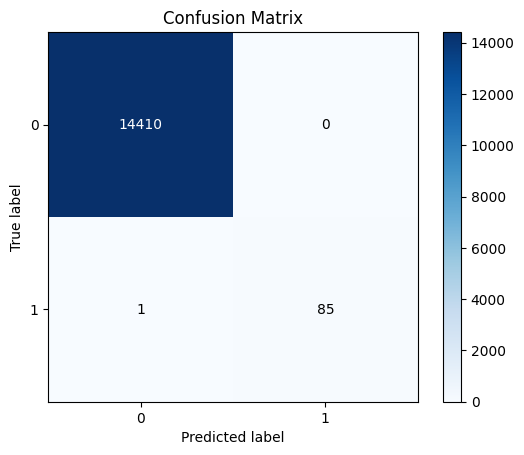

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14410
           1       1.00      0.99      0.99        86

    accuracy                           1.00     14496
   macro avg       1.00      0.99      1.00     14496
weighted avg       1.00      1.00      1.00     14496



### Target: CNAE

In [ ]:
dataset_cnae.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target,target_Seção,target_Divisão,target_Grupo,target_Classe,target_cnae
1,35.464.962/0001-86,4399103,5000.0,1,6,43,439,43991,1179,4321500,4330404,4399103,4399103,4399103,6,43,432,43215,6,43,433,43304,6,43,439,43991,6,43,439,43991,6,43,439,43991,0,-1,-1,-1,-1,0
4,35.465.492/0001-75,7739002,2000.0,1,14,77,773,77390,1179,7739002,7739002,7739002,7739002,7739002,14,77,773,77390,14,77,773,77390,14,77,773,77390,14,77,773,77390,14,77,773,77390,0,-1,-1,0,0,0
10,35.466.449/0001-24,9001906,2400.0,1,18,90,900,90019,1179,9001906,9001906,9001906,9001906,9001906,18,90,900,90019,18,90,900,90019,18,90,900,90019,18,90,900,90019,18,90,900,90019,0,-1,0,0,0,0
13,35.466.690/0001-53,4292801,100000.0,1,6,42,429,42928,1178,4292801,4292801,4292801,4292801,4292801,6,42,429,42928,6,42,429,42928,6,42,429,42928,6,42,429,42928,6,42,429,42928,0,-1,-1,-1,0,0
16,35.467.185/0001-23,1821100,1000.0,1,3,18,182,18211,1178,1821100,1821100,1821100,1821100,1821100,3,18,182,18211,3,18,182,18211,3,18,182,18211,3,18,182,18211,3,18,182,18211,0,-1,-1,-1,0,0


In [ ]:
dataset_cnae.drop(columns=['cnpj', 'target', 'target_Divisão', 'target_Grupo','target_Classe', 'target_Seção'], inplace= True)
dataset_cnae.head()

/tmp/ipykernel_31060/3426044716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target_cnae
1,4399103,5000.0,1,6,43,439,43991,1179,4321500,4330404,4399103,4399103,4399103,6,43,432,43215,6,43,433,43304,6,43,439,43991,6,43,439,43991,6,43,439,43991,0
4,7739002,2000.0,1,14,77,773,77390,1179,7739002,7739002,7739002,7739002,7739002,14,77,773,77390,14,77,773,77390,14,77,773,77390,14,77,773,77390,14,77,773,77390,0
10,9001906,2400.0,1,18,90,900,90019,1179,9001906,9001906,9001906,9001906,9001906,18,90,900,90019,18,90,900,90019,18,90,900,90019,18,90,900,90019,18,90,900,90019,0
13,4292801,100000.0,1,6,42,429,42928,1178,4292801,4292801,4292801,4292801,4292801,6,42,429,42928,6,42,429,42928,6,42,429,42928,6,42,429,42928,6,42,429,42928,0
16,1821100,1000.0,1,3,18,182,18211,1178,1821100,1821100,1821100,1821100,1821100,3,18,182,18211,3,18,182,18211,3,18,182,18211,3,18,182,18211,3,18,182,18211,0


In [ ]:
y = dataset_cnae['target_cnae']
X = dataset_cnae[dataset_cnae.columns.difference(['target_cnae'])]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1559501, 33), (668358, 33), (1559501,), (668358,))

##### DecisionTree

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(X_train, y_train)

In [ ]:
model

DecisionTreeClassifier(random_state=42)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_24 <= 7000.00
|   |--- feature_29 <= 4930202.00
|   |   |--- feature_4 <= 49300.50
|   |   |   |--- feature_25 <= 4767653.00
|   |   |   |   |--- feature_30 <= 4755102.50
|   |   |   |   |   |--- feature_24 <= 5999.95
|   |   |   |   |   |   |--- feature_13 <= 477.00
|   |   |   |   |   |   |   |--- feature_30 <= 4644702.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_30 >  4644702.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 46464.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  46464.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_13 >  477.00
|   |   |   |   |   |   |   |--- feature_26 <= 4785300.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_26 >  4785300.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_24 >  5999.95
|   |   |   |   |   |   |--- featu

In [ ]:
list(X.columns)

['Classe',
 'Classe1',
 'Classe2',
 'Classe3',
 'Classe4',
 'Classe5',
 'Divisão',
 'Divisão1',
 'Divisão2',
 'Divisão3',
 'Divisão4',
 'Divisão5',
 'Grupo',
 'Grupo1',
 'Grupo2',
 'Grupo3',
 'Grupo4',
 'Grupo5',
 'Seção',
 'Seção1',
 'Seção2',
 'Seção3',
 'Seção4',
 'Seção5',
 'capital_social',
 'cnae',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_3',
 'cnae_sec_4',
 'cnae_sec_5',
 'idade_empresa',
 'porte']

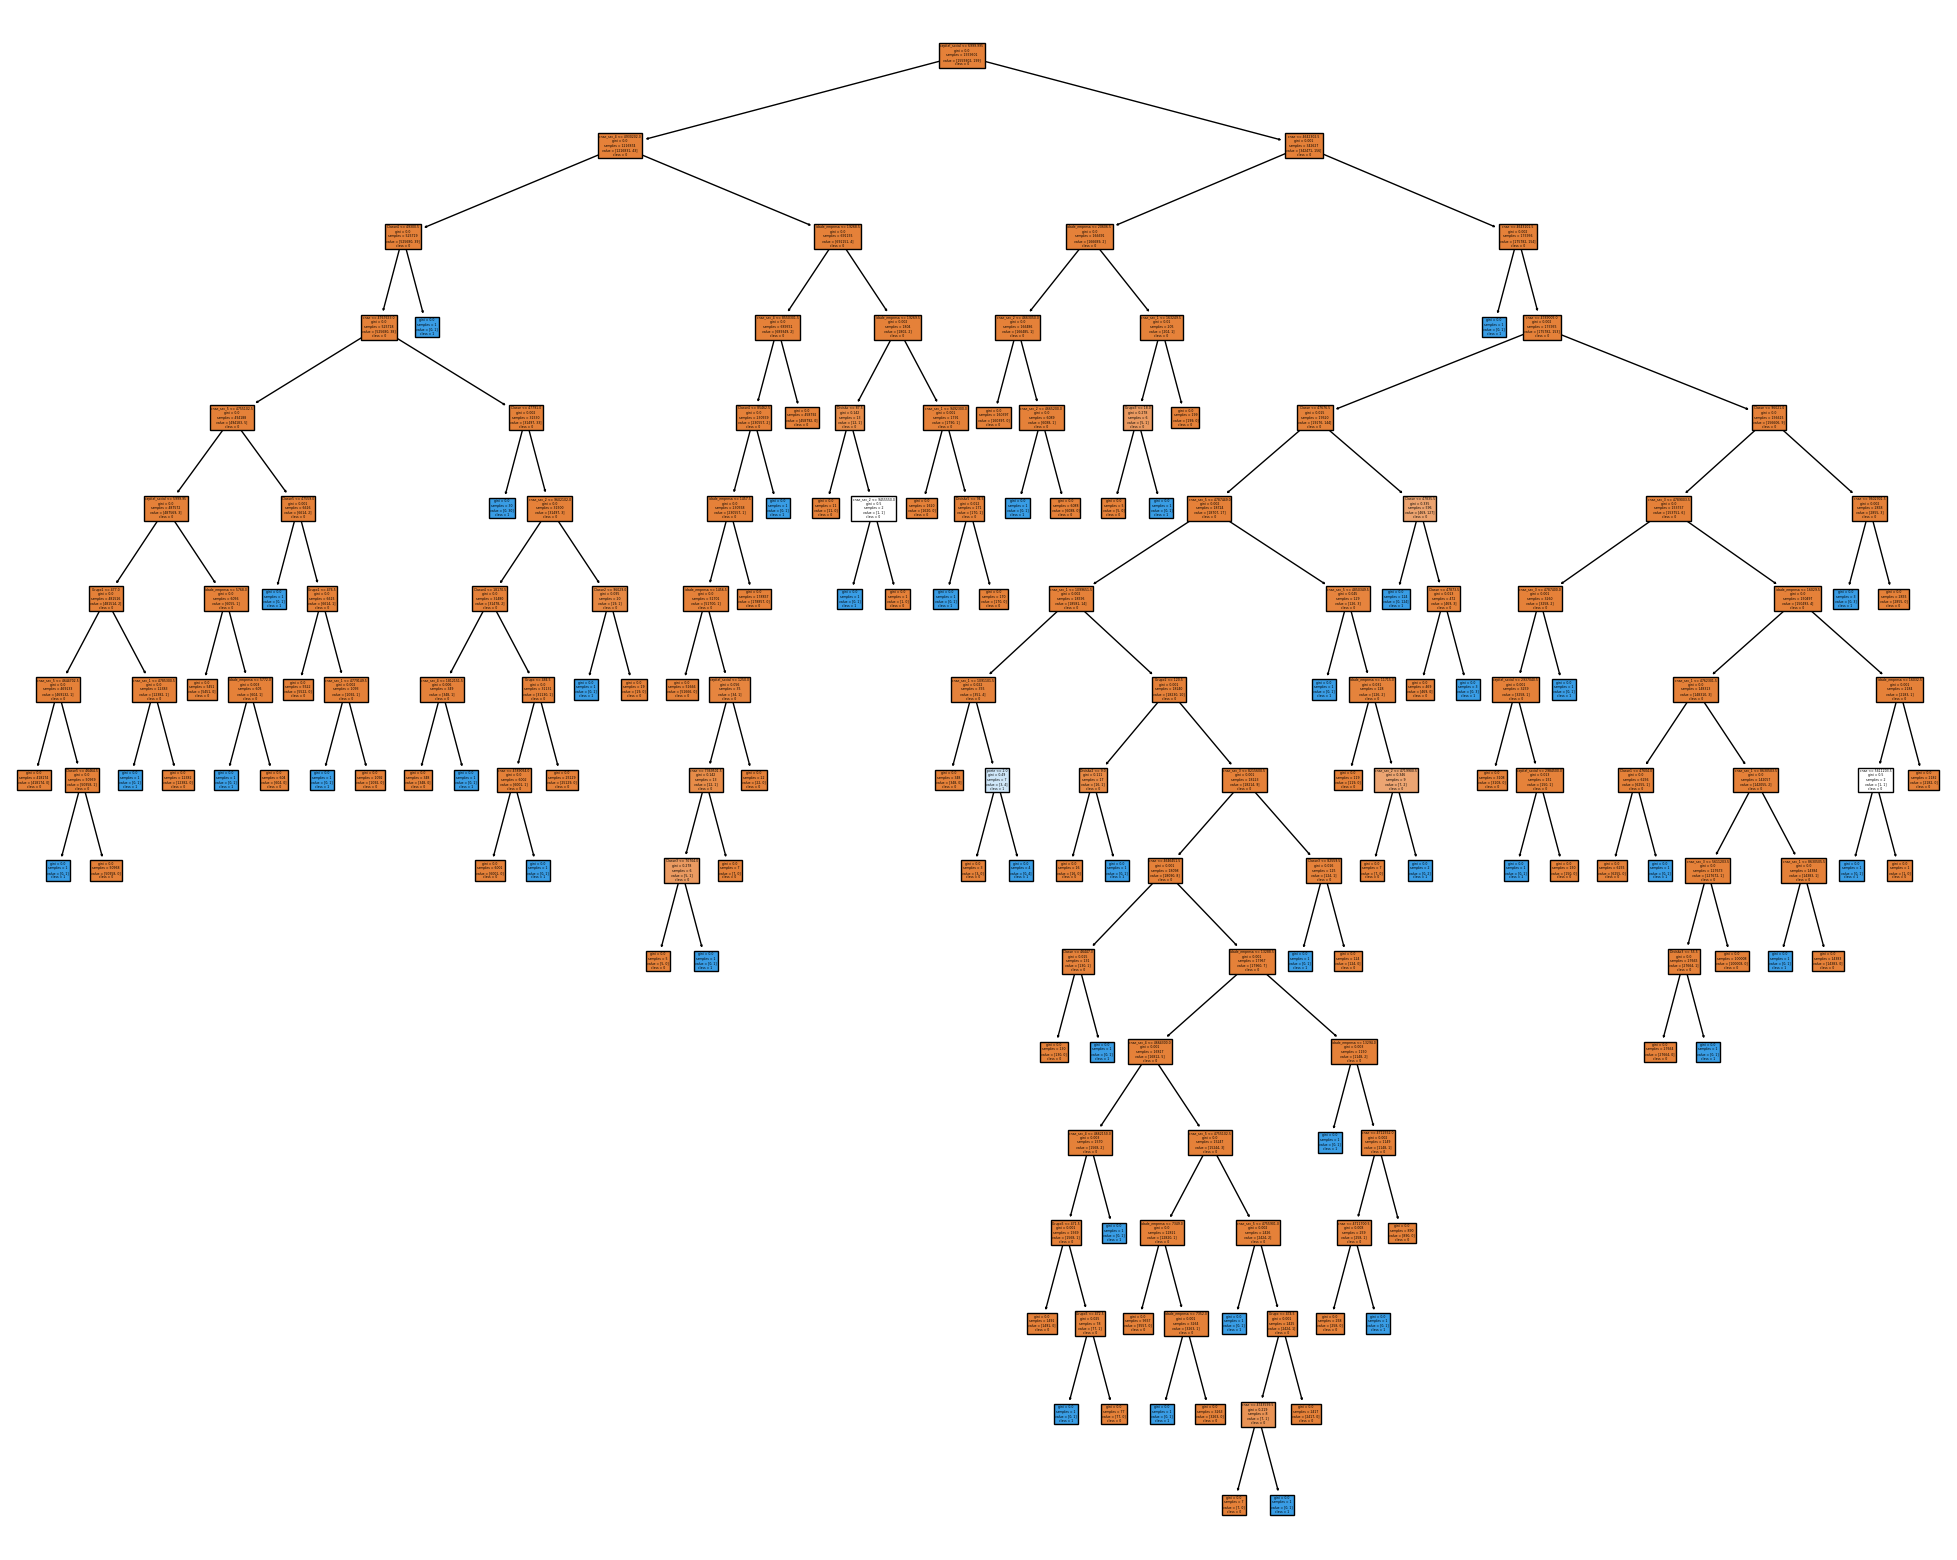

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list(X.columns),  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
y_pred = model.predict(X_test)

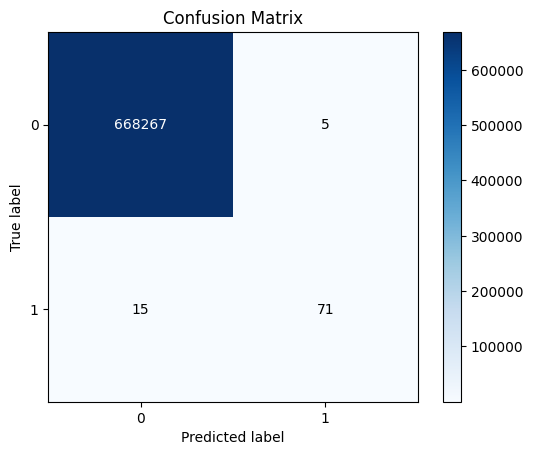

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    668272
           1       0.93      0.83      0.88        86

    accuracy                           1.00    668358
   macro avg       0.97      0.91      0.94    668358
weighted avg       1.00      1.00      1.00    668358



## teste

In [ ]:
df.head()

In [ ]:
teste[teste.cnae_sec_1.isnull()]

In [ ]:
teste = df.head()

In [ ]:
teste.cnae_sec_1.value_counts()

In [ ]:
teste['cnae_sec_1'] = teste['cnae_sec_1'].fillna(teste['cnae'])
teste

## teste

In [ ]:
# importando a biblioteca pandas
import pandas as pd

# inicializando uma lista com listas
data = [['tom', 10, 0], ['nick', 15, 1], ['juli', 14, 0], ['elisa', 10, 1]]

# Criando um dataframe do pandas
df = pd.DataFrame(data, columns=['Nome', 'Idade', 'target'])

# mostrando o dataframe
df

,Nome,Idade,target
0,tom,10,0
1,nick,15,1
2,juli,14,0
3,elisa,10,1


In [ ]:
df_1_target11a = df.loc[(df['target'] == 1)]
df_1_target11a

,Nome,Idade,target
1,nick,15,1
3,elisa,10,1


### Vetbr

In [ ]:
df_cnpj = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/VetBr/cnpj_filial1_vetbr.csv')
df_cnpj.head()

,CODCLI,RAZAOSOCIAL,FANTASIA,CNPJ,CODFILIAL
0,13,ABASTECIMENTOS OLIVEIRA CAMPOS LTDA,PONTO DO CRIADOR,04.735.078/0001-05,1.0
1,16,ADAO MARCELINO DE LACERDA,AGROPECUARIA LACERDA,05.309.143/0001-01,1.0
2,19,CASA DO RURALISTA LTDA,CASA DO RURALISTA,19.600.212/0001-38,1.0
3,20,MARCOS ANTONIO MUNIZ,CASA DO AGRICULTOR,03.637.281/0001-86,1.0
4,22,ADEMIR APARECIDO CONSTANTINO,NaN,04.162.718/0001-35,1.0


In [ ]:
df_cnpj.isnull().sum()

CODCLI            0
RAZAOSOCIAL       0
FANTASIA       2705
CNPJ              0
CODFILIAL         0
dtype: int64

In [ ]:
df_limpo = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/VetBr/dataset_limpo_vetbr_filial1.csv')
df_limpo.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target,target_Seção,target_Divisão,target_Grupo,target_Classe,target_cnae
0,35.464.865/0001-93,8230001,300.0,1,14,82,823,82300,1206,8230001,8230001,8230001,8230001,8230001,14,82,823,82300,14,82,823,82300,14,82,823,82300,14,82,823,82300,14,82,823,82300,0,-1,-1,-1,-1,-1
1,35.464.962/0001-86,4399103,5000.0,1,6,43,439,43991,1206,4321500,4330404,4399103,4399103,4399103,6,43,432,43215,6,43,433,43304,6,43,439,43991,6,43,439,43991,6,43,439,43991,0,-1,-1,-1,-1,-1
2,35.465.399/0001-60,4520002,5000.0,1,7,45,452,45200,1206,4520005,4399103,4330404,4330405,4520002,7,45,452,45200,6,43,439,43991,6,43,433,43304,6,43,433,43304,7,45,452,45200,0,-1,-1,-1,-1,-1
3,35.465.446/0001-76,9602501,1000.0,1,19,96,960,96025,1206,9602501,9602501,9602501,9602501,9602501,19,96,960,96025,19,96,960,96025,19,96,960,96025,19,96,960,96025,19,96,960,96025,0,-1,-1,-1,-1,-1
4,35.465.492/0001-75,7739002,2000.0,1,14,77,773,77390,1206,7739002,7739002,7739002,7739002,7739002,14,77,773,77390,14,77,773,77390,14,77,773,77390,14,77,773,77390,14,77,773,77390,0,-1,-1,-1,-1,-1


In [ ]:
df_limpo.shape

(5796092, 40)

In [ ]:
df_limpo1 = df_limpo[df_limpo['target'] == 1]
df_limpo1.shape

(4943, 40)

In [ ]:
df_cnpj.rename(columns={'CNPJ': 'cnpj'}, inplace=True)
df_cnpj.head()

,CODCLI,RAZAOSOCIAL,FANTASIA,cnpj,CODFILIAL
0,13,ABASTECIMENTOS OLIVEIRA CAMPOS LTDA,PONTO DO CRIADOR,04.735.078/0001-05,1.0
1,16,ADAO MARCELINO DE LACERDA,AGROPECUARIA LACERDA,05.309.143/0001-01,1.0
2,19,CASA DO RURALISTA LTDA,CASA DO RURALISTA,19.600.212/0001-38,1.0
3,20,MARCOS ANTONIO MUNIZ,CASA DO AGRICULTOR,03.637.281/0001-86,1.0
4,22,ADEMIR APARECIDO CONSTANTINO,NaN,04.162.718/0001-35,1.0


In [ ]:
df_merge = pd.merge(df_limpo1, df_cnpj, how='left', on='cnpj')
df_merge.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target,target_Seção,target_Divisão,target_Grupo,target_Classe,target_cnae,CODCLI,RAZAOSOCIAL,FANTASIA,CODFILIAL
0,35.509.080/0001-90,4744099,1000.0,1,7,47,474,47440,1202,4541206,4721103,4530703,4789005,4744099,7,45,454,45412,7,47,472,47211,7,45,453,45307,7,47,478,47890,7,47,474,47440,1,1,1,1,1,1,138019.0,ANGELO EMANUEL SOUZA ROQUE 12815576686,DISTRIBUIDORA SOUZA,1.0
1,35.949.077/0001-97,4789004,20000.0,1,7,47,478,47890,1145,4771704,9609208,4789004,4789004,4789004,7,47,477,47717,19,96,960,96092,7,47,478,47890,7,47,478,47890,7,47,478,47890,1,1,1,1,1,1,139276.0,O BICHO PETSHOP E RACOES LTDA,E O BICHO PET SHOP,1.0
2,29.361.279/0001-10,9609208,3000.0,1,19,96,960,96092,1880,4623109,4644302,4771704,4789004,9609208,7,46,462,46231,7,46,464,46443,7,47,477,47717,7,47,478,47890,19,96,960,96092,1,1,1,1,1,1,97269.0,IAGO ELIAS BENTO PETSHOP,DIVINOPET,1.0
3,32.770.456/0001-27,4744099,60000.0,1,7,47,474,47440,1474,4623106,4623109,4723700,4771704,4789002,7,46,462,46231,7,46,462,46231,7,47,472,47237,7,47,477,47717,7,47,478,47890,1,1,1,1,1,1,168640.0,PAULO ROCHA DOS ANJOS 97391425672,NaN,1.0
4,36.332.132/0001-68,9609208,5000.0,1,19,96,960,96092,1112,9609207,322104,159802,321304,4789004,19,96,960,96092,1,3,32,3221,1,1,15,1598,1,3,32,3213,7,47,478,47890,1,1,1,1,1,1,142261.0,LETICIA DE PAIVA REIS DOS SANTOS 02221203631,CENTRO DE ESTETICA ANIMAL,1.0


In [ ]:
df_merge.dropna(subset=['CODFILIAL'], inplace=True)

In [ ]:
df_merge.isnull().sum()

cnpj                 0
cnae                 0
capital_social       0
porte                0
Seção                0
Divisão              0
Grupo                0
Classe               0
idade_empresa        0
cnae_sec_1           0
cnae_sec_2           0
cnae_sec_3           0
cnae_sec_4           0
cnae_sec_5           0
Seção1               0
Divisão1             0
Grupo1               0
Classe1              0
Seção2               0
Divisão2             0
Grupo2               0
Classe2              0
Seção3               0
Divisão3             0
Grupo3               0
Classe3              0
Seção4               0
Divisão4             0
Grupo4               0
Classe4              0
Seção5               0
Divisão5             0
Grupo5               0
Classe5              0
target               0
target_Seção         0
target_Divisão       0
target_Grupo         0
target_Classe        0
target_cnae          0
CODCLI               0
RAZAOSOCIAL          0
FANTASIA          1146
CODFILIAL  

In [ ]:
df_merge.drop(columns=['CODCLI','RAZAOSOCIAL','FANTASIA','CODFILIAL'], inplace=True)
df_merge.head()

,cnpj,cnae,capital_social,porte,Seção,Divisão,Grupo,Classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,Seção1,Divisão1,Grupo1,Classe1,Seção2,Divisão2,Grupo2,Classe2,Seção3,Divisão3,Grupo3,Classe3,Seção4,Divisão4,Grupo4,Classe4,Seção5,Divisão5,Grupo5,Classe5,target,target_Seção,target_Divisão,target_Grupo,target_Classe,target_cnae
0,35.509.080/0001-90,4744099,1000.0,1,7,47,474,47440,1202,4541206,4721103,4530703,4789005,4744099,7,45,454,45412,7,47,472,47211,7,45,453,45307,7,47,478,47890,7,47,474,47440,1,1,1,1,1,1
1,35.949.077/0001-97,4789004,20000.0,1,7,47,478,47890,1145,4771704,9609208,4789004,4789004,4789004,7,47,477,47717,19,96,960,96092,7,47,478,47890,7,47,478,47890,7,47,478,47890,1,1,1,1,1,1
2,29.361.279/0001-10,9609208,3000.0,1,19,96,960,96092,1880,4623109,4644302,4771704,4789004,9609208,7,46,462,46231,7,46,464,46443,7,47,477,47717,7,47,478,47890,19,96,960,96092,1,1,1,1,1,1
3,32.770.456/0001-27,4744099,60000.0,1,7,47,474,47440,1474,4623106,4623109,4723700,4771704,4789002,7,46,462,46231,7,46,462,46231,7,47,472,47237,7,47,477,47717,7,47,478,47890,1,1,1,1,1,1
4,36.332.132/0001-68,9609208,5000.0,1,19,96,960,96092,1112,9609207,322104,159802,321304,4789004,19,96,960,96092,1,3,32,3221,1,1,15,1598,1,3,32,3213,7,47,478,47890,1,1,1,1,1,1


In [ ]:
df_merge.shape

(4716, 40)